In [71]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import LineModelND, ransac
from skimage.transform import AffineTransform

np.random.seed(seed=1)

# xyz[::2] += 20 * noise[::2]
# xyz[::4] += 100 * noise[::4]

# Pairs

In [72]:
# alternative pairs

xyz_src = np.random.random([50, 3])
xyz_dst = np.zeros_like(xyz_src)
xyz_dst[:, 0] = xyz_src[:, 0]
xyz_dst[:, 1] = xyz_src[:, 2]
xyz_dst[:, 2] = xyz_src[:, 1]

noise = np.random.normal(size=xyz_src.shape)
xyz_src += 0.01 * noise
xyz_src[::4] += 5.0 * noise[::4]

noise = np.random.normal(size=xyz_src.shape)
xyz_dst += 0.01 * noise
xyz_dst[::4] += 5.0 * noise[::4]

In [73]:
xyz_src

array([[-6.46229577e+00,  2.29927305e+00,  4.23937922e+00],
       [ 2.93737413e-01,  1.50261351e-01,  7.92157607e-02],
       [ 1.85873256e-01,  3.29403003e-01,  4.07981651e-01],
       [ 5.42905739e-01,  4.18948345e-01,  6.77467884e-01],
       [ 6.58596946e+00,  1.07332972e+01, -9.28110155e+00],
       [ 6.82829150e-01,  4.33581310e-01,  5.62069945e-01],
       [ 1.28394258e-01,  2.06734942e-01,  7.98935366e-01],
       [ 9.62222369e-01,  3.01123597e-01,  6.97827991e-01],
       [ 4.84835155e+00, -2.22928229e+00,  2.69313166e+00],
       [ 2.76113693e-02,  1.77849030e-01,  8.78608176e-01],
       [ 9.64811361e-02,  4.20090166e-01,  9.66578392e-01],
       [ 5.40669401e-01,  6.97171767e-01,  3.16892643e-01],
       [ 1.07638478e+00,  3.93271078e+00,  1.18308602e+00],
       [ 7.56969829e-01,  9.85759921e-01,  7.23817277e-01],
       [ 2.90832238e-01,  8.11149125e-01,  1.07639651e-01],
       [ 4.46891974e-01,  9.07231056e-01,  2.92423606e-01],
       [ 3.74996474e-01, -5.49128526e+00

In [74]:
xyz_dst

array([[  0.94919785,  -7.64354401,   4.70340523],
       [  0.29858819,   0.09367908,   0.15877644],
       [  0.18910769,   0.39939215,   0.34832572],
       [  0.53148402,   0.69357955,   0.43462811],
       [  4.00606861,   4.46078075,  -3.51706297],
       [  0.66178964,   0.54428107,   0.42962733],
       [  0.13784514,   0.81474301,   0.19028237],
       [  0.96388649,   0.69327687,   0.32263868],
       [  1.18074763,   1.14277923,   0.97740978],
       [  0.04082666,   0.8669778 ,   0.17063969],
       [  0.09648104,   0.95732129,   0.42603099],
       [  0.5263585 ,   0.31467055,   0.6889035 ],
       [  2.77718397,   3.94998924,  -3.95205489],
       [  0.75600342,   0.76882349,   0.97414952],
       [  0.27214227,   0.09442023,   0.78648835],
       [  0.46412202,   0.29374768,   0.90164857],
       [  3.4030109 ,  -2.98565374,   5.7583235 ],
       [  0.6818882 ,   0.27943445,   0.20501467],
       [  0.52188173,   0.58236345,   0.05990835],
       [  0.14621669,   0.69250

In [75]:
# model_robust, inliers = ransac((xyz_src[:,:2], xyz_dst[:,:2]), AffineTransform, min_samples=3,
#                                residual_threshold=2, max_trials=100)

In [76]:
from sklearn.linear_model import RANSACRegressor

reg = RANSACRegressor(random_state=0).fit(xyz_src, xyz_dst)

C:\Users\Jirik\Miniconda3\envs\lisa3qt5\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\Jirik\Miniconda3\envs\lisa3qt5\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses mu

# Affine Transform Matrix Construction

In [77]:
reg.predict([[4, 4, 4]])

array([[3.86982041, 4.03938834, 3.90194265]])

In [78]:
reg.estimator_.coef_

array([[ 0.97871029, -0.00422389, -0.01076445],
       [ 0.00618197,  0.00157028,  1.00287497],
       [ 0.00481938,  0.98105952, -0.01402617]])

In [79]:
reg.estimator_.intercept_

array([ 0.0149326 , -0.00312051,  0.01453172])

In [80]:
tm = np.column_stack([reg.estimator_.coef_, reg.estimator_.intercept_])
tm = np.row_stack([tm, [0, 0, 0, 1]])
tm

array([[ 0.97871029, -0.00422389, -0.01076445,  0.0149326 ],
       [ 0.00618197,  0.00157028,  1.00287497, -0.00312051],
       [ 0.00481938,  0.98105952, -0.01402617,  0.01453172],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

# Volumetric data trasformation

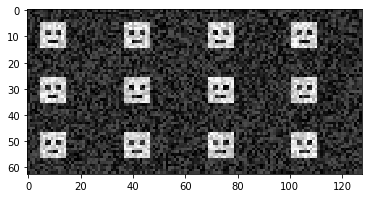

In [81]:
import numpy as np
import scipy.ndimage
import imma
import itertools
import sed3
import matplotlib.pyplot as plt

data3d = np.random.random([20, 21, 32])
data3d[:, 5:15, 5:15] += 2
data3d[
    :,
    12:13,
    8:12,
] -= 2
data3d[
    :,
    8:10,
    7:9,
] -= 2
data3d[
    :,
    8:10,
    11:13,
] -= 2
# for i, (x,y,z) in enumerate(itertools.product([0,10], [0,10], [0,10])):
#     data3d[x:, y:, z:] += i

sed3.show_slices(data3d, slice_number=12)
plt.show()

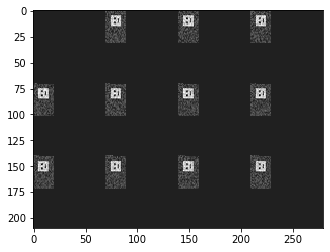

In [82]:
# tmatrix = np.array([
#     [1, 0, 0, 0],
#     [0, 0.5, 0.1, 0],
#     [0, 0.1, 0.5, 0],
#     [0, 0, 0, 1],
# ])
tmatrix = tm

data3d_2 = scipy.ndimage.affine_transform(data3d, tmatrix, output_shape=[20, 70, 70])
sed3.show_slices(data3d_2, slice_number=12)
plt.show()